<a href="https://colab.research.google.com/github/tonykipkemboi/ReinforcementLearningTradingBot/blob/main/%24STOCK_ReinforcementLearningTradingBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies

In [ ]:
!pip3 install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

In [ ]:
# Gym imports
import gym
import gym_anytrading

# Stable baselines
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Mount MarketWatch Stock Data

In [59]:
from google.colab import files
uploaded = files.upload()

Saving Download Data - STOCK_US_XNAS_TSLA.csv to Download Data - STOCK_US_XNAS_TSLA (1).csv


In [60]:
df = pd.read_csv('/content/Download Data - STOCK_US_XNAS_TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,06/18/2021,613.37,628.35,611.80,623.31,"24,560,910"
1,06/17/2021,601.89,621.47,601.34,616.60,"22,701,350"
2,06/16/2021,597.54,608.50,593.50,604.87,"22,144,131"
3,06/15/2021,616.69,616.79,598.23,599.36,"17,764,150"
4,06/14/2021,612.23,625.49,609.18,617.69,"20,423,980"


In [61]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-06-18,613.37,628.35,611.80,623.31,"24,560,910"
2021-06-17,601.89,621.47,601.34,616.60,"22,701,350"
2021-06-16,597.54,608.50,593.50,604.87,"22,144,131"
2021-06-15,616.69,616.79,598.23,599.36,"17,764,150"
2021-06-14,612.23,625.49,609.18,617.69,"20,423,980"


In [62]:
df.sort_values('Date', ascending=True, inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-06-18,200.60,203.84,198.89,200.79,"48,759,679"
2020-06-19,202.56,203.19,198.27,200.18,"43,398,744"
2020-06-22,199.99,201.78,198.00,198.86,"31,811,750"
2020-06-23,199.78,202.40,198.80,200.36,"31,826,355"
2020-06-24,198.82,200.18,190.63,192.17,"54,797,949"


In [63]:
env = gym.make('stocks-v0', df=df, frame_bound=(10,150), window_size=10)
#env.prices
#env.signal_features

# Build Environment

In [64]:
# Buy & Sell
env.action_space

Discrete(2)

info {'total_reward': 393.6500000000004, 'total_profit': 1.323978683673413, 'position': 1}


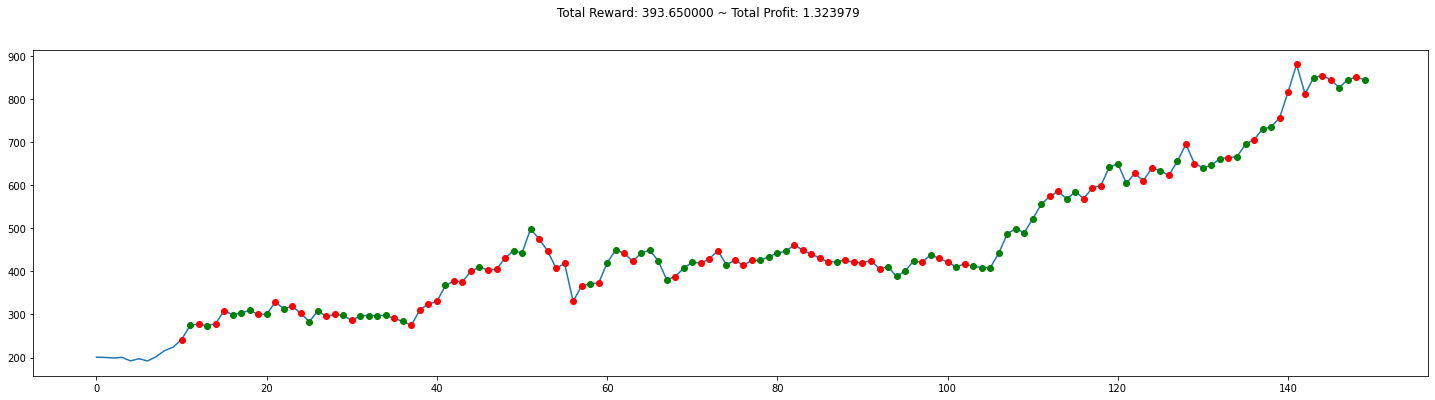

In [65]:
state = env.reset()

while True:
  action = env.action_space.sample()
  n_state, reward, done, info = env.step(action)
  if done:
    print('info', info)
    break

plt.figure(figsize=(25,6))
plt.cla()
env.render_all()
plt.show()

#green-->buy
#red-->short

# Add Custom Indicators

##Install & Import New Dependencies

In [ ]:
!pip install finta

In [111]:
from finta import TA
from gym_anytrading.envs import StocksEnv

##Fix Volume Column

In [68]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [73]:
# convert Volume to float
df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(',','')))

In [74]:
df['Volume'].head()

Date
2020-06-18    48759679.0
2020-06-19    43398744.0
2020-06-22    31811750.0
2020-06-23    31826355.0
2020-06-24    54797949.0
Name: Volume, dtype: float64

In [75]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

##Calculate SMA, RSI, & OBV

In [83]:
df['SMA'] = TA.SMA(df, 12)
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
df.fillna(0, inplace=True)

In [84]:
df.head(15)

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2020-06-18,200.60,203.84,198.89,200.79,48759679.0,0.000000,0.000000,0.0
2020-06-19,202.56,203.19,198.27,200.18,43398744.0,0.000000,0.000000,-43398744.0
2020-06-22,199.99,201.78,198.00,198.86,31811750.0,0.000000,0.000000,-75210494.0
2020-06-23,199.78,202.40,198.80,200.36,31826355.0,0.000000,46.129948,-43384139.0
2020-06-24,198.82,200.18,190.63,192.17,54797949.0,0.000000,12.425773,-98182088.0
2020-06-25,190.85,197.20,187.43,197.20,46272744.0,0.000000,40.957774,-51909344.0
2020-06-26,198.96,199.00,190.97,191.95,44274539.0,0.000000,29.979088,-96183883.0
2020-06-29,193.80,202.00,189.70,201.87,45132019.0,0.000000,54.692075,-51051864.0
2020-06-30,201.30,217.54,200.75,215.96,84592499.0,0.000000,70.576602,33540635.0


##Create New Envs

In [112]:
def add_signals(env):
  start = env.frame_bound[0] - env.window_size
  end = env.frame_bound[1]
  prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
  signal_features = env.df.loc[:, ['Low', 'Volume', 'SMA', 'RSI', 'OBV']].to_numpy()[start:end]
  return prices, signal_features

In [113]:
class MyCustomEnv(StocksEnv):
  _process_data = add_signals

env2 = MyCustomEnv(df=df, window_size=12, frame_bound=(23,50))

In [102]:
env2.prices

array([253.21, 267.34, 262.27, 270.26, 275.2 , 294.22, 286.2 , 291.4 ,
       293.2 , 298.  , 297.6 , 311.6 , 312.4 , 296.15, 273.31, 282.6 ,
       294.88, 297.4 , 294.2 , 284.2 , 288.88, 292.4 , 293.66, 295.45,
       283.  , 277.17, 273.  , 287.  , 313.45, 325.33, 334.57, 369.02,
       368.24, 371.41, 405.01, 385.5 , 393.6 , 410.73, 428.5 ])

In [103]:
df.head()

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2020-06-18,200.60,203.84,198.89,200.79,48759679.0,0.0,0.000000,0.0
2020-06-19,202.56,203.19,198.27,200.18,43398744.0,0.0,0.000000,-43398744.0
2020-06-22,199.99,201.78,198.00,198.86,31811750.0,0.0,0.000000,-75210494.0
2020-06-23,199.78,202.40,198.80,200.36,31826355.0,0.0,46.129948,-43384139.0
2020-06-24,198.82,200.18,190.63,192.17,54797949.0,0.0,12.425773,-98182088.0


# Build Environment & Train

In [114]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [115]:
model = A2C('MlpLstmPolicy', env, verbose=1)
model.learn(total_timesteps=100000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


---------------------------------
| explained_variance | -876     |
| fps                | 17       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 0.000314 |
---------------------------------
---------------------------------
| explained_variance | -0.00263 |
| fps                | 318      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 72.6     |
---------------------------------
----------------------------------
| explained_variance | -0.000874 |
| fps                | 354   

# Evaluation

In [139]:
env = MyCustomEnv(df=df, window_size=12, frame_bound=(40,190))
obs = env.reset()

while True:
  obs = obs[np.newaxis, ...]
  action, _states = model.predict(obs)
  obs, rewards, done, info = env.step(action)
  if done:
    print('info', info)
    break

info {'total_reward': 333.3099999999998, 'total_profit': 1.6126533041045992, 'position': 0}


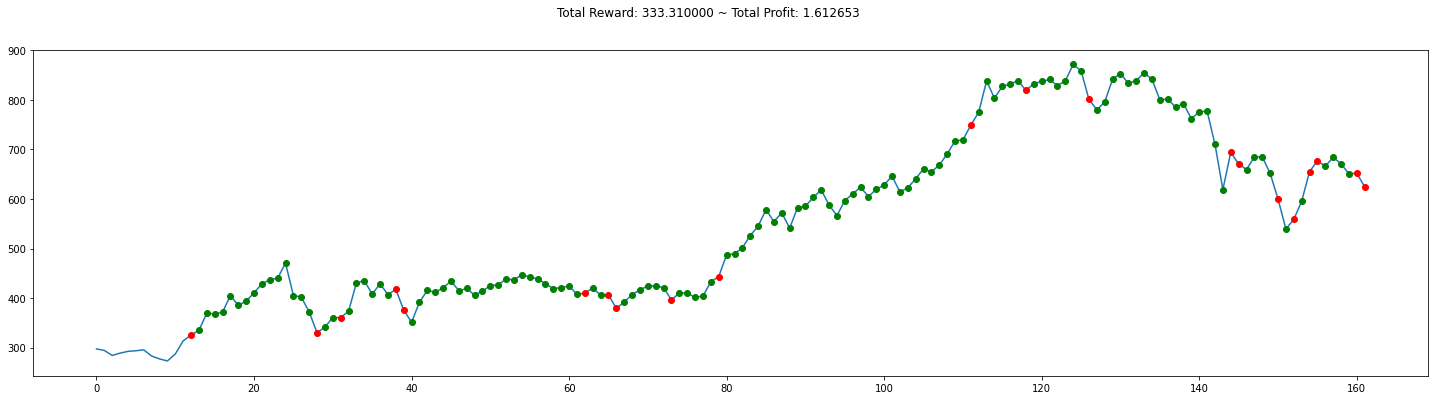

In [140]:
plt.figure(figsize=(25,6))
plt.cla()
env.render_all()
plt.show()
#green-->buy
#red-->short